In [55]:
import pandas as pd
import os

In [56]:
os.getcwd()
os.chdir('C:\\')

In [57]:
ak = pd.ExcelFile('Ecommerce_data.xlsx')
ak

In [58]:
print(ak.sheet_names)

['Orders', 'Returns', 'People']


In [59]:
orders = pd.read_excel(ak, 'Orders')
returns = pd.read_excel(ak, 'Returns')
people = pd.read_excel(ak, 'People')

In [60]:
orders.head(), returns.head(), people.head()

(   Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
 0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
 1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
 2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
 3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
 4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   
 
     Customer ID     Customer Name      Segment  Postal Code           City  \
 0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
 1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
 2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
 3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
 4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   
 
    ... Sub-Category                               Product Name   

In [61]:
merge = pd.merge(orders, returns, on='Order ID')
merge

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unnamed: 24,Unnamed: 25,Returned,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.160,2,0.0,720.3600,725.570,Critical,NaN,NaN,Yes,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.500,5,0.0,153.7500,627.270,Critical,NaN,NaN,Yes,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1356.030,3,0.0,311.8500,458.970,Critical,NaN,NaN,Yes,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,882.150,5,0.0,114.6000,203.920,Critical,NaN,NaN,Yes,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,148.320,3,0.0,68.2200,25.480,Critical,NaN,NaN,Yes,Eastern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,35040,CA-2014-WB21850140-41654,2014-01-15,2014-01-21,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,...,49.536,3,0.2,17.3376,2.670,Medium,NaN,NaN,Yes,Eastern US
2216,35038,CA-2014-WB21850140-41654,2014-01-15,2014-01-21,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,...,16.520,4,0.0,7.5992,1.690,Medium,NaN,NaN,Yes,Eastern US
2217,25,US-2013-SJ2021582-41543,2013-09-26,2013-09-29,First Class,SJ-2021582,Sarah Jordon,Consumer,NaN,Hermosillo,...,181.116,9,0.4,-75.5640,1.085,Medium,NaN,NaN,Yes,Central America
2218,36974,CA-2012-ZC21910140-41271,2012-12-28,2013-01-04,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,60610.0,Chicago,...,38.976,3,0.6,-50.6688,5.290,Low,NaN,NaN,Yes,Central US


In [62]:
merge.shape

(2220, 28)

In [63]:
merge.isnull().any().sum()

3

In [64]:
ecom = merge.dropna(axis=1)

In [65]:
ecom.shape

(2220, 25)

In [66]:
list(ecom)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Region_x',
 'Market',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority',
 'Returned',
 'Region_y']

# 1.What is the total value of the order that was returned?

In [67]:
total_returned_value = ecom['Sales'].sum()
print('The Total Returned Value is',total_returned_value)

The Total Returned Value is 525932.22736


# 2.What is the total returned value by region?

In [68]:
returned_value_regionwise = ecom.groupby(['Region_y'])[['Sales']].sum()
returned_value_regionwise

,Sales
Region_y,
Caribbean,9679.32828
Central Africa,4038.48000
Central America,44334.79916
Central Asia,359.03100
Central US,23306.14500
Eastern Africa,2026.44000
Eastern Asia,47798.04300
Eastern Canada,2639.91000
Eastern Europe,9501.21000


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Region_y', ylabel='Sales'>

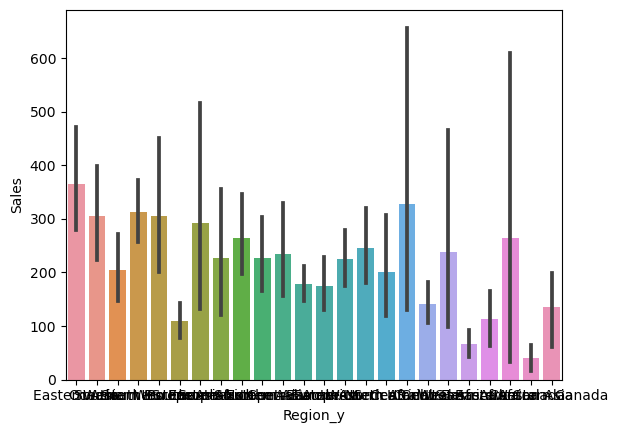

In [70]:
sns.barplot(x=ecom.Region_y, y=ecom['Sales'])

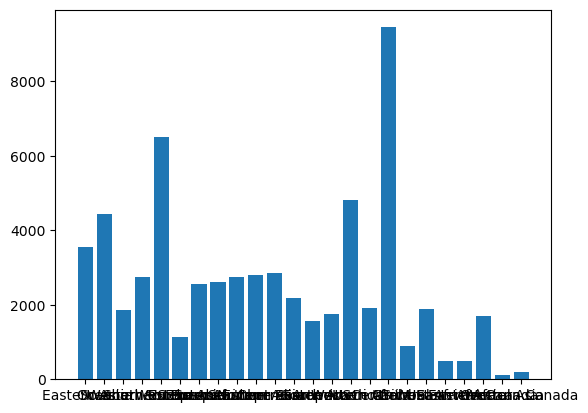

In [71]:
plt.bar(ecom.Region_y, ecom.Sales);

# 3. What is the total returned value for category and sub_category using product id?

In [72]:
ak1 = pd.ExcelFile('Ecommerce_data.xlsx')
ak1

In [73]:
orders_df = pd.read_excel(ak1, 'Orders')
returns_df = pd.read_excel(ak1, 'Returns')

In [74]:
merged_df = pd.merge(orders_df, returns_df, on='Order ID')

In [75]:
returned_value_categorywise = merged_df.groupby(['Category', 'Sub-Category'])[['Sales']].sum()
returned_value_categorywise

Sales
Category        Sub-Category             
Furniture       Bookcases     60710.99170
                Chairs        57439.11790
                Furnishings   16581.79860
                Tables        33283.15700
Office Supplies Appliances    32975.10160
                Art           16221.50620
                Binders       23571.83300
                Envelopes      6784.22590
                Fasteners      3098.36380
                Labels         3349.15170
                Paper          9928.68380
                Storage       52938.56010
                Supplies       8327.68320
Technology      Accessories   33991.09180
                Copiers       65145.83696
                Machines      32550.62610
                Phones        69034.49800

# 4. What is total number of products returned whose unit price is more than 100dollars?

In [76]:
ecom['Unit Price'] = ecom['Sales'] / ecom['Quantity']
ecom

C:\Users\aksha\AppData\Local\Temp\ipykernel_19932\3487383005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['Unit Price'] = ecom['Sales'] / ecom['Quantity']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Region_y,Unit Price
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,"Lesro Conference Table, with Bottom Storage",1715.160,2,0.0,720.3600,725.570,Critical,Yes,Eastern Asia,857.580
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,"Safco Classic Bookcase, Pine",2197.500,5,0.0,153.7500,627.270,Critical,Yes,Eastern Asia,439.500
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,"Lesro Round Table, with Bottom Storage",1356.030,3,0.0,311.8500,458.970,Critical,Yes,Eastern Asia,452.010
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,"Office Star Swivel Stool, Adjustable",882.150,5,0.0,114.6000,203.920,Critical,Yes,Eastern Asia,176.430
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,"Okidata Calculator, Red",148.320,3,0.0,68.2200,25.480,Critical,Yes,Eastern Asia,49.440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,35040,CA-2014-WB21850140-41654,2014-01-15,2014-01-21,Standard Class,WB-218501406,William Brown,Consumer,New York City,New York,...,"Square Ring Data Binders, Rigid 75 Pt. Covers,...",49.536,3,0.2,17.3376,2.670,Medium,Yes,Eastern US,16.512
2216,35038,CA-2014-WB21850140-41654,2014-01-15,2014-01-21,Standard Class,WB-218501406,William Brown,Consumer,New York City,New York,...,"#10 Gummed Flap White Envelopes, 100/Box",16.520,4,0.0,7.5992,1.690,Medium,Yes,Eastern US,4.130
2217,25,US-2013-SJ2021582-41543,2013-09-26,2013-09-29,First Class,SJ-2021582,Sarah Jordon,Consumer,Hermosillo,Sonora,...,"Deflect-O Clock, Black",181.116,9,0.4,-75.5640,1.085,Medium,Yes,Central America,20.124
2218,36974,CA-2012-ZC21910140-41271,2012-12-28,2013-01-04,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,Chicago,Illinois,...,Tenex Chairmats For Use with Hard Floors,38.976,3,0.6,-50.6688,5.290,Low,Yes,Central US,12.992


In [77]:
ak2 = ecom[ecom['Unit Price'] > 100]
total_returned_products = ak2['Quantity'].sum()
print('The Total Returned Products is', total_returned_products)

The Total Returned Products is 1607


# 5. How many of the orders deliverd on the same day, 7days, 15days and >30 days?

In [78]:
ecom['delivery_days'] = (ecom['Ship Date'] - ecom['Order Date']).dt.days
ecom

C:\Users\aksha\AppData\Local\Temp\ipykernel_19932\2699074905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['delivery_days'] = (ecom['Ship Date'] - ecom['Order Date']).dt.days


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Region_y,Unit Price,delivery_days
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,1715.160,2,0.0,720.3600,725.570,Critical,Yes,Eastern Asia,857.580,3
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,2197.500,5,0.0,153.7500,627.270,Critical,Yes,Eastern Asia,439.500,3
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,1356.030,3,0.0,311.8500,458.970,Critical,Yes,Eastern Asia,452.010,3
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,882.150,5,0.0,114.6000,203.920,Critical,Yes,Eastern Asia,176.430,3
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,148.320,3,0.0,68.2200,25.480,Critical,Yes,Eastern Asia,49.440,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,35040,CA-2014-WB21850140-41654,2014-01-15,2014-01-21,Standard Class,WB-218501406,William Brown,Consumer,New York City,New York,...,49.536,3,0.2,17.3376,2.670,Medium,Yes,Eastern US,16.512,6
2216,35038,CA-2014-WB21850140-41654,2014-01-15,2014-01-21,Standard Class,WB-218501406,William Brown,Consumer,New York City,New York,...,16.520,4,0.0,7.5992,1.690,Medium,Yes,Eastern US,4.130,6
2217,25,US-2013-SJ2021582-41543,2013-09-26,2013-09-29,First Class,SJ-2021582,Sarah Jordon,Consumer,Hermosillo,Sonora,...,181.116,9,0.4,-75.5640,1.085,Medium,Yes,Central America,20.124,3
2218,36974,CA-2012-ZC21910140-41271,2012-12-28,2013-01-04,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,Chicago,Illinois,...,38.976,3,0.6,-50.6688,5.290,Low,Yes,Central US,12.992,7


In [79]:
sameday = ecom[ecom['delivery_days'] == 0].shape[0]
within_7days = ecom[(ecom['delivery_days'] > 0) & (ecom['delivery_days'] <= 7)].shape[0]
within_15days = ecom[(ecom['delivery_days'] > 7) & (ecom['delivery_days'] <= 15)].shape[0]
morethan_30days = ecom[ecom['delivery_days'] > 30].shape[0]

In [80]:
print(f"Same Day: {sameday}")
print(f"Within 7 Days: {within_7days}")
print(f"Within 15 Days: {within_15days}")
print(f"More than 30 Days: {morethan_30days}")

Same Day: 115
Within 7 Days: 2105
Within 15 Days: 0
More than 30 Days: 0


# 6.Check is there a relation between price and quantity?

In [81]:
from scipy.stats import pearsonr

In [82]:
pearsonr(ecom['Unit Price'],ecom['Quantity'])

PearsonRResult(statistic=-0.028330344451430955, pvalue=0.18208808203216745)

## Inference
## Since the r value is -0.028. so, it is a negative correlation. It Indicates that almost there is no linear relationship between the unit price and quantity.
## A negative value suggests that there might be a very weak inverse relationship, meaning as the price increases, the quantity might decrease slightly, but the effect is negligible.

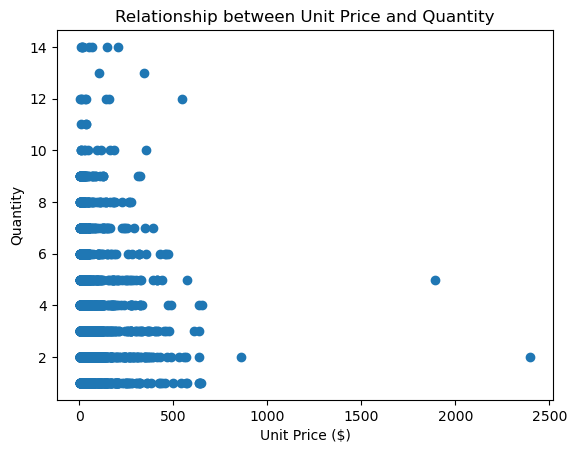

In [83]:
plt.scatter(ecom['Unit Price'], ecom['Quantity'])
plt.title('Relationship between Unit Price and Quantity')
plt.xlabel('Unit Price ($)')
plt.ylabel('Quantity')
plt.show()

# 7. Use the calculation from question 5 and order priority to check is there any relationship between order priority and days taken.

In [84]:
from scipy import stats

In [85]:
delivery_priority_stats = ecom.groupby('Order Priority')['delivery_days'].describe()
print(delivery_priority_stats)

                 count      mean       std  min  25%  50%  75%  max
Order Priority                                                     
Critical         188.0  1.750000  1.135829  0.0  1.0  2.0  3.0  3.0
High             643.0  3.205288  1.453807  0.0  2.0  4.0  4.0  5.0
Low              125.0  6.552000  0.499290  6.0  6.0  7.0  7.0  7.0
Medium          1264.0  4.528481  1.393053  0.0  4.0  5.0  5.0  7.0


In [86]:
anova_result = stats.f_oneway(
    ecom[ecom['Order Priority'] == 'Low']['delivery_days'],
    ecom[ecom['Order Priority'] == 'Medium']['delivery_days'],
    ecom[ecom['Order Priority'] == 'High']['delivery_days'],
    ecom[ecom['Order Priority'] == 'Critical']['delivery_days'])

print(f"ANOVA result: {anova_result}")

ANOVA result: F_onewayResult(statistic=456.90010105295534, pvalue=4.523164187330846e-231)


## The p-value from the ANOVA test is less than 0.05, it indicates a statistically significant difference in delivery times between different order priority levels.

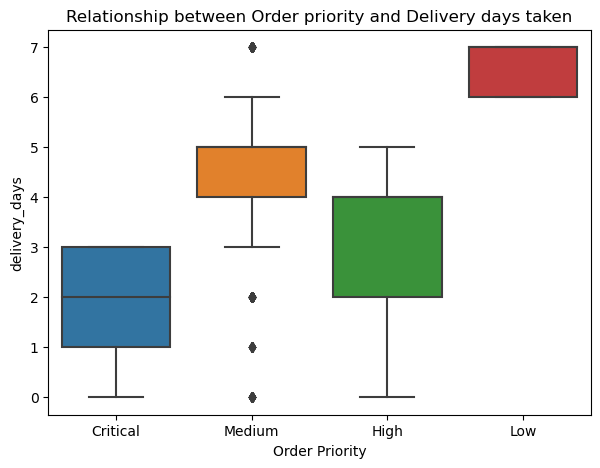

In [87]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Order Priority', y='delivery_days', data=ecom)
plt.title('Relationship between Order priority and Delivery days taken')
plt.show()